In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_lfw_people

In [3]:
people = fetch_lfw_people(min_faces_per_person=30)

In [4]:
people.images[0]

array([[109.333336, 104.666664,  97.333336, ...,  68.333336,  52.      ,
         70.666664],
       [ 96.333336, 104.      , 102.      , ...,  77.333336,  55.      ,
         60.333332],
       [ 93.333336,  99.333336,  99.333336, ...,  98.      ,  81.      ,
         75.333336],
       ...,
       [ 95.666664, 100.666664,  99.      , ...,  28.333334,  27.666666,
         14.      ],
       [ 77.333336,  90.      ,  97.      , ...,  32.666668,  28.      ,
          9.666667],
       [ 55.666668,  67.      ,  87.      , ...,  32.666668,  25.333334,
          8.      ]], dtype=float32)

In [5]:
len(people.images)

2370

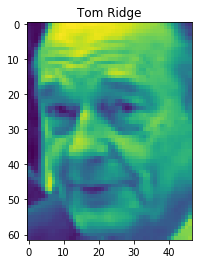

In [6]:
plt.imshow(people.images[2360])
plt.title(people.target_names[30]);

In [7]:
people.images[0].shape

(62, 47)

In [8]:
62*47

2914

In [9]:
people.images.shape

(2370, 62, 47)

In [11]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

In [12]:

X = people.data/255.


In [13]:
y = people.target

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [15]:
pipe = Pipeline([('pca', PCA(.8)), ('knn', KNeighborsClassifier(n_neighbors=1))])

In [16]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=0.8,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('knn',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=1, p=2,
                                      weights='uniform'))],
         verbose=False)

In [17]:
pipe.score(X_test, y_test)

0.3288364249578415

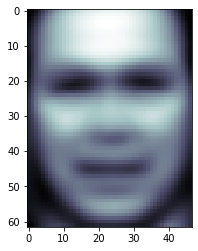

In [18]:
plt.imshow(pipe.named_steps['pca'].mean_.reshape(people.images[0].shape),
          cmap = plt.cm.bone)

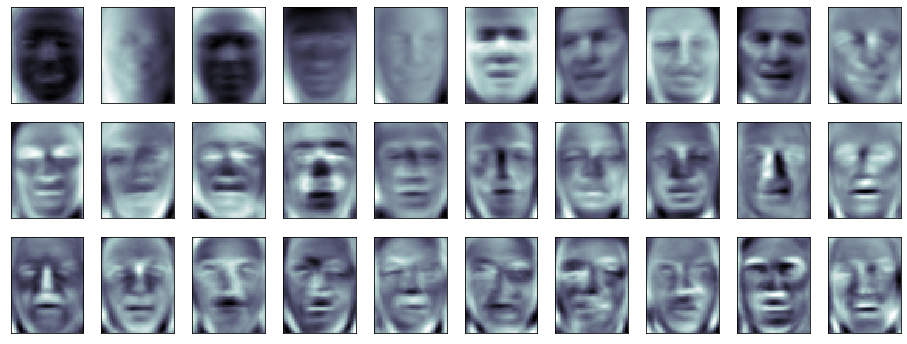

In [20]:

fig = plt.figure(figsize=(16, 6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pipe.named_steps['pca'].components_[i].reshape(people.images[0].shape),
              cmap=plt.cm.bone)

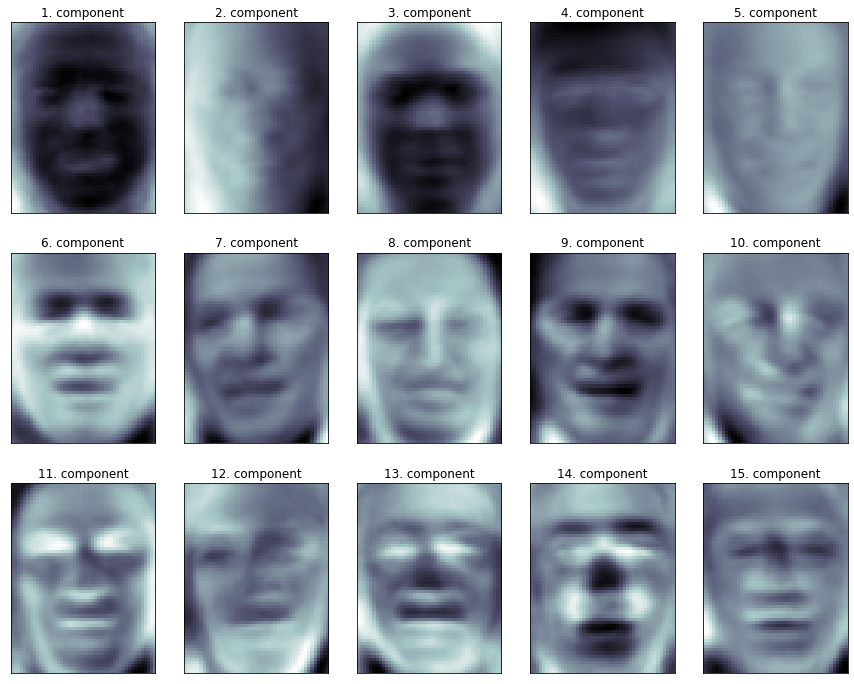

In [23]:
fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pipe.named_steps['pca'].components_, axes.ravel())):
    ax.imshow(component.reshape(people.images[0].shape),
              cmap=plt.cm.bone)
    ax.set_title("{}. component".format((i + 1)))

In [36]:
np.unique(y_test)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33],
      dtype=int64)

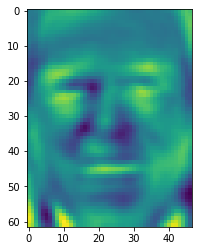

In [72]:
plt.imshow(pipe.named_steps['pca'].components_[30, :].reshape(people.images[0].shape))

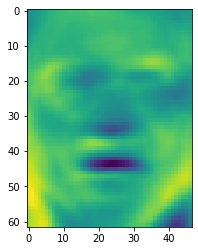

In [66]:
#fig = plt.figure(figsize=(16, 6))

for i in range(0,33):
    complete_image = complete_image+pipe.named_steps['pca'].components_[i, :] 
        
#     ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])

plt.imshow(complete_image.reshape(people.images[0].shape))

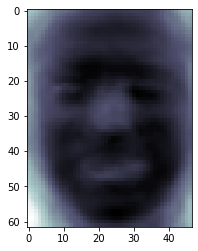

In [62]:
complete_image=pipe.named_steps['pca'].components_[0, :] 
+pipe.named_steps['pca'].components_[1, :] 
+pipe.named_steps['pca'].components_[2, :] 
plt.imshow(complete_image.reshape(people.images[0].shape),cmap=plt.cm.bone)

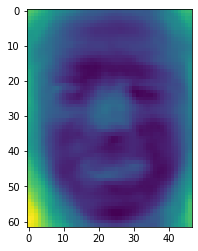

In [68]:
complete_image2=pipe.named_steps['pca'].components_[0] 
+pipe.named_steps['pca'].components_[1] 
+pipe.named_steps['pca'].components_[2] 
+pipe.named_steps['pca'].components_[3, :] 
+pipe.named_steps['pca'].components_[4, :] 
+pipe.named_steps['pca'].components_[5, :] 
+pipe.named_steps['pca'].components_[6, :] 
plt.imshow(complete_image2.reshape(people.images[0].shape))

In [49]:
pipe.predict(X_test)

array([16,  3, 13, 31,  8,  7,  8, 17, 14,  8,  5,  8, 19,  5, 28,  8, 31,
       15, 12, 18,  8, 13,  8, 29, 28,  9, 15,  5,  9, 31,  5,  0, 31,  8,
        8,  9,  9,  5,  9, 23,  7, 13,  8,  5,  3,  8,  7,  3,  8, 11, 18,
        8, 15, 33,  9, 26,  5,  8, 31, 14, 33,  8, 31,  7,  7,  5,  8,  5,
       25, 24,  8,  8, 31, 18,  5,  5, 15,  8,  9, 25,  8,  8,  9, 28,  7,
        8,  5,  5,  7, 31, 33,  9,  5, 24, 31, 16,  1,  5,  4,  8, 17,  8,
        8,  7,  9,  8, 27, 18, 14,  5,  8, 26,  5, 31, 22, 31,  0,  7, 18,
        8,  3,  4,  8, 24, 33,  3, 31,  8, 17, 13, 23,  8,  3, 29,  5,  8,
       31,  3, 14,  8,  9,  9,  7,  5,  4, 13, 10,  5,  7, 23, 25, 18,  8,
        8,  9, 17, 31,  6,  8,  6, 31,  8,  8,  2, 24,  3,  8, 19,  9, 23,
        4,  9, 17, 30,  8,  5, 22,  8,  8,  8,  8, 20,  8,  5, 31, 28, 29,
        5, 17,  5, 14,  8, 22, 31, 29, 26,  1, 25, 16, 28,  5, 13,  0, 28,
        8,  6,  8,  8, 27,  8, 26, 23, 17, 21,  8, 25, 25,  8, 26, 11, 31,
        7, 27,  8, 19,  5

In [50]:
X_test[0]

array([0.49803922, 0.475817  , 0.40784314, ..., 0.23267974, 0.15555556,
       0.1124183 ], dtype=float32)

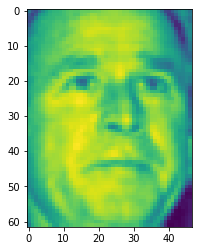

In [52]:
plt.imshow(X_test[60].reshape(people.images[0].shape))